In [3]:
import numpy as np
import pandas as pd
from zipfile import ZipFile
import matplotlib.pyplot as plt

In [5]:
zip_dir = "./adult.csv.zip"
zip_ref = ZipFile(zip_dir, 'r')
zip_ref.extractall()
zip_ref.close()

In [6]:
data_dir = "./adult.csv"
df = pd.read_csv(data_dir)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [7]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [12]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

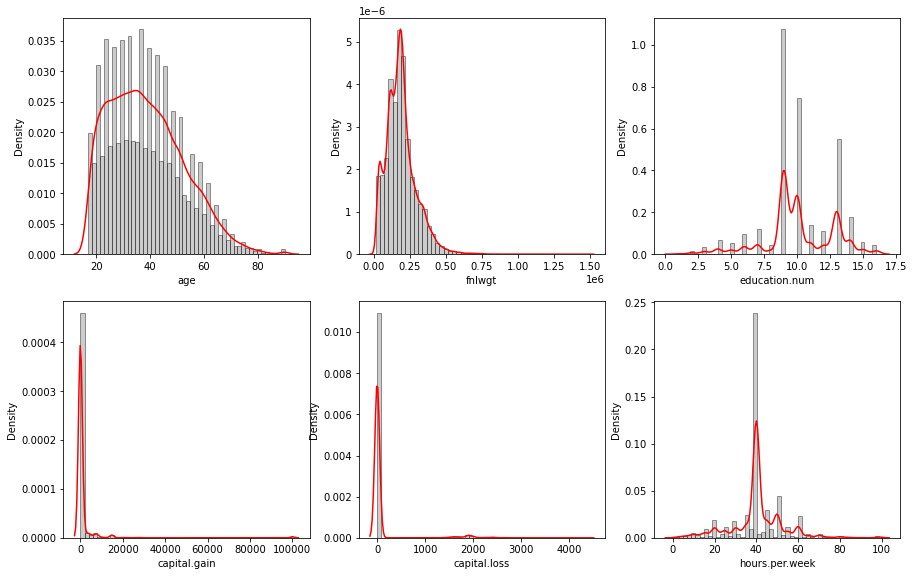

In [15]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# Numerical Column Data Distribution
fig = plt.figure(figsize=[15,20])
cols = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
cnt = 1
for col in cols:
    plt.subplot(4,3,cnt)
    sns.distplot(df[col], hist_kws=dict(edgecolor='k', linewidth=1, color='grey'), color='red')
    cnt+=1
plt.show()

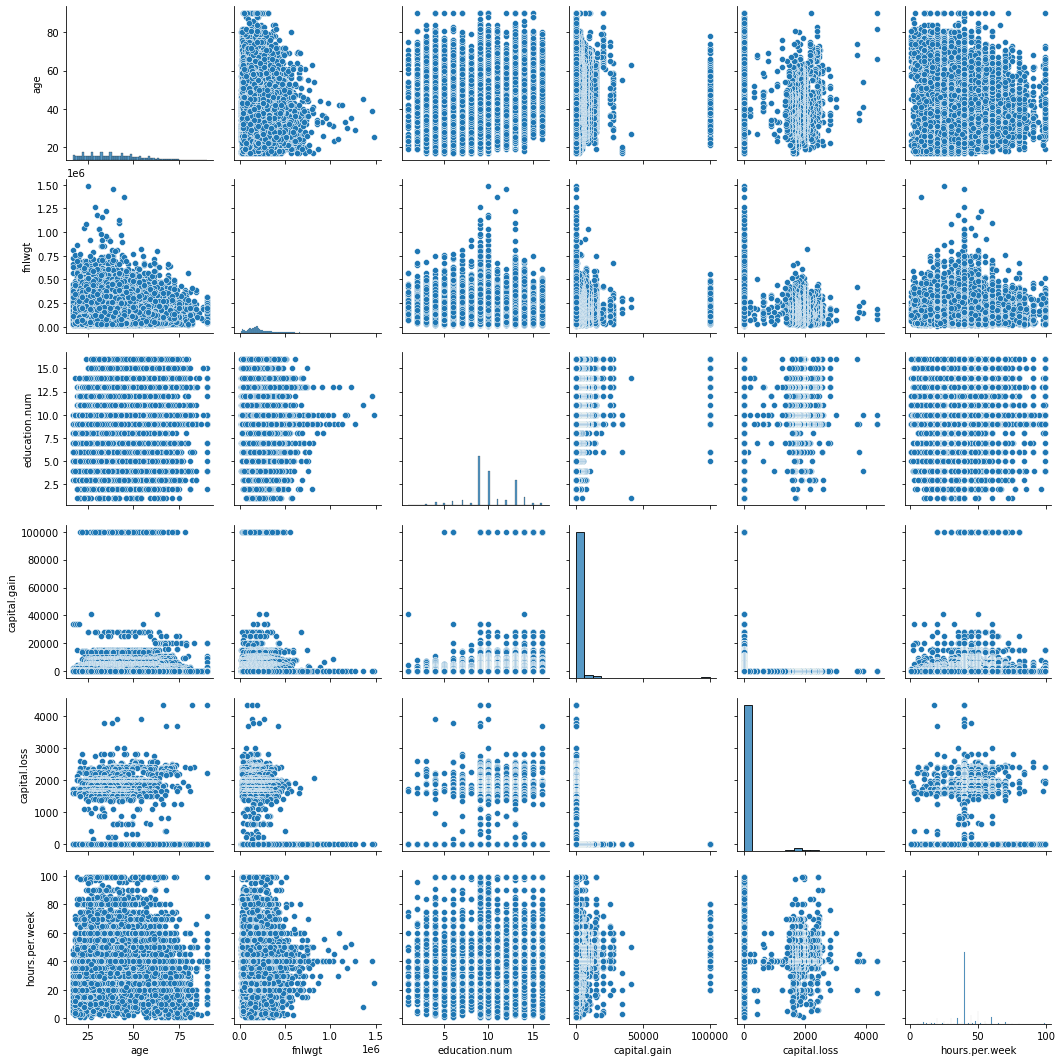

In [17]:
sns.pairplot(df)
plt.show()

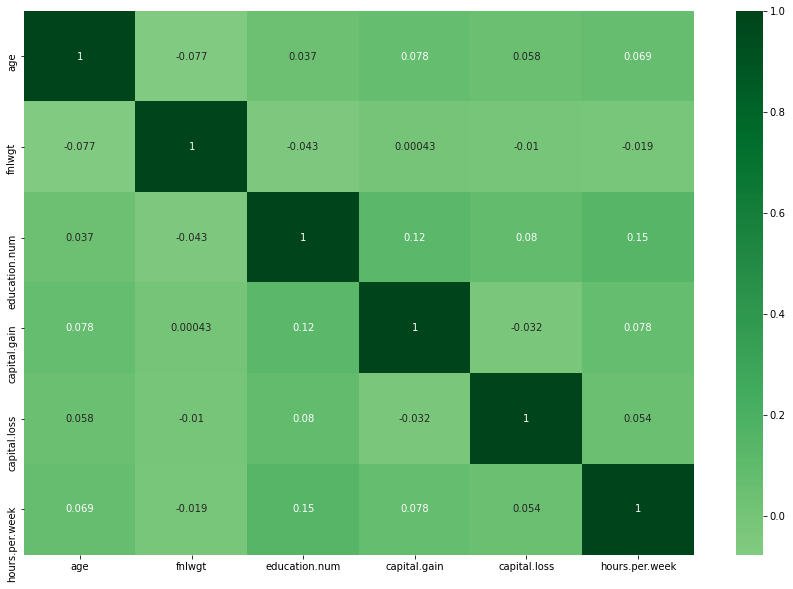

In [18]:
fig = plt.figure(figsize=[15,10])
sns.heatmap(df.corr(), annot = True, cmap="Greens", center=0)
plt.show()

In [24]:
df.shape

(32561, 15)

In [36]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [33]:
df['workclass'].replace(["?"], df['workclass'].mode()[0], inplace=True)

In [35]:
df['occupation'].replace(["?"], df['occupation'].mode()[0], inplace=True)

In [39]:
df.workclass.unique()

array(['Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

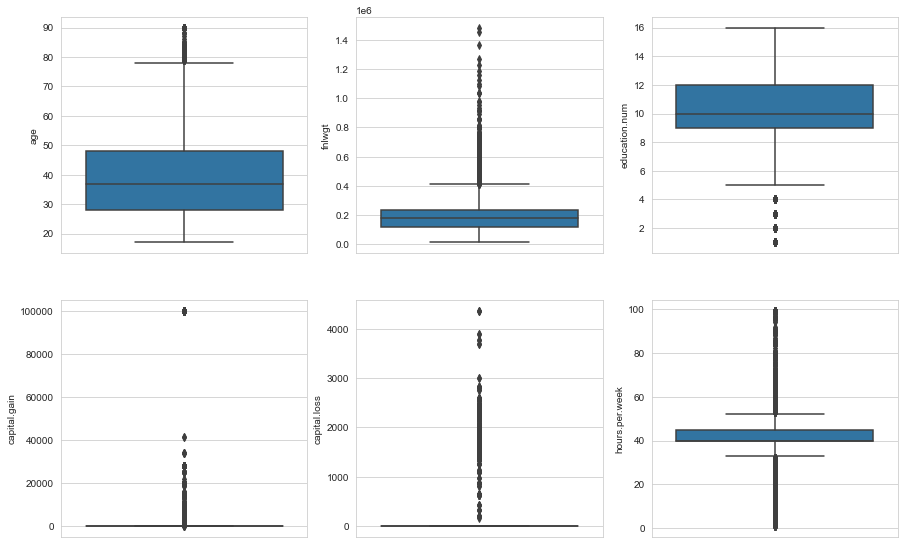

In [46]:
sns.set_style("whitegrid")
fig = plt.figure(figsize = [15,20])
cols = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
cnt = 1
for col in cols :
    plt.subplot(4,3,cnt)
    sns.boxplot(data = df, y = col)
    cnt+=1
plt.show()

In [48]:
df['income'] = df["income"].apply(lambda x: 1 if x == "<=50K" else 0)

In [49]:
df['income'].unique()

array([1, 0], dtype=int64)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


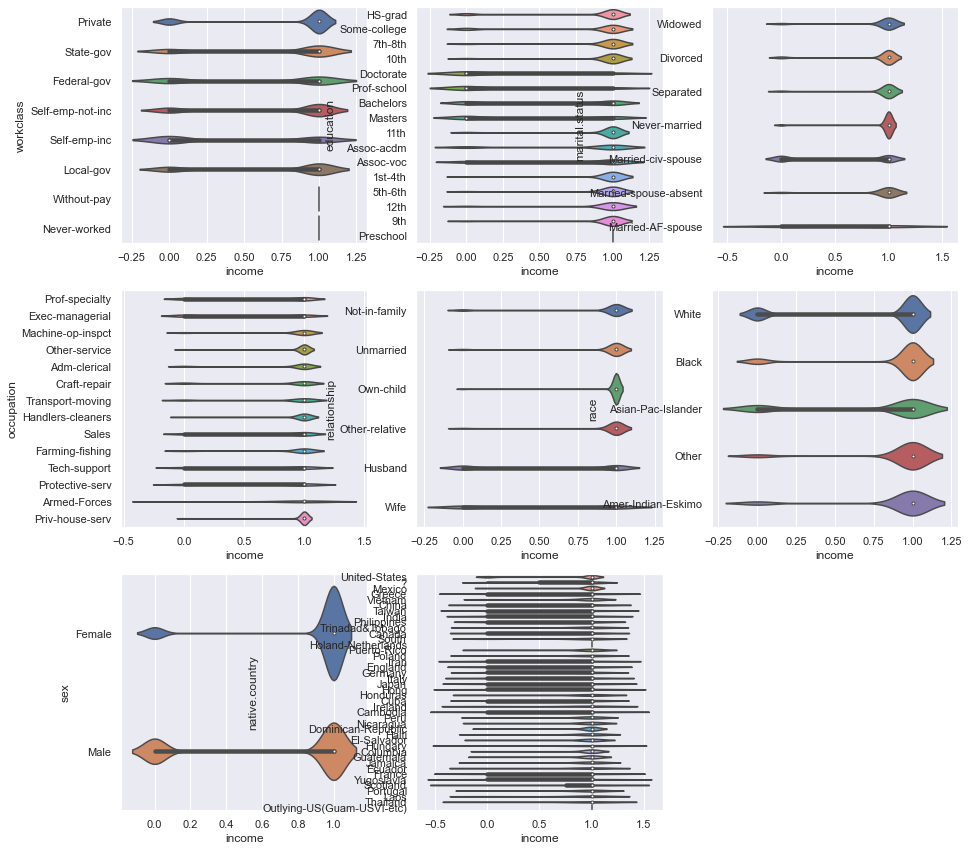

In [53]:
sns.set()
fig = plt.figure(figsize = [15,20])
cols = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
cnt = 1
for col in cols :
    plt.subplot(4,3,cnt)
    sns.violinplot(x="income", y=col, data=df)
    cnt+=1
plt.show()

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
le = LabelEncoder()

In [58]:
cols = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

for col in cols:
    le.fit(df[col].unique())
    df[col] = le.transform(df[col])

In [59]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,3,77053,11,9,6,9,1,4,0,0,4356,40,39,1
1,82,3,132870,11,9,6,3,1,4,0,0,4356,18,39,1
2,66,3,186061,15,10,6,9,4,2,0,0,4356,40,39,1
3,54,3,140359,5,4,0,6,4,4,0,0,3900,40,39,1
4,41,3,264663,15,10,5,9,3,4,0,0,3900,40,39,1


In [60]:
df['workclass'].unique()

array([3, 6, 0, 5, 4, 1, 7, 2])

In [61]:
y = df['income'].values

In [62]:
y

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [65]:
X = df.drop("income", 1)

In [66]:
X

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,3,77053,11,9,6,9,1,4,0,0,4356,40,39
1,82,3,132870,11,9,6,3,1,4,0,0,4356,18,39
2,66,3,186061,15,10,6,9,4,2,0,0,4356,40,39
3,54,3,140359,5,4,0,6,4,4,0,0,3900,40,39
4,41,3,264663,15,10,5,9,3,4,0,0,3900,40,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,3,310152,15,10,4,10,1,4,1,0,0,40,39
32557,27,3,257302,7,12,2,12,5,4,0,0,0,38,39
32558,40,3,154374,11,9,2,6,0,4,1,0,0,40,39
32559,58,3,151910,11,9,6,0,4,4,0,0,0,40,39


In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
dt = DecisionTreeClassifier(max_depth=4)

In [75]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [76]:
y_pred = dt.predict(X_test)

In [77]:
from sklearn.metrics import classification_report

In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.51      0.60      2351
           1       0.86      0.94      0.90      7418

    accuracy                           0.84      9769
   macro avg       0.80      0.73      0.75      9769
weighted avg       0.83      0.84      0.83      9769



In [79]:
from sklearn.preprocessing import StandardScaler

In [83]:
cols = X_train.columns

In [84]:
scaler = StandardScaler()
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.fit_transform(X_test[cols])

In [85]:
X_train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
2375,0.699523,-0.084103,-0.417493,-0.333914,1.135054,-0.406311,-1.550922,-0.897938,0.396051,0.698028,0.880435,-0.215117,-0.038592,0.290976
17309,0.110984,-2.787746,-0.680511,-0.333914,1.135054,0.922141,0.718263,-0.272455,0.396051,-1.432607,-0.147569,-0.215117,0.366263,0.290976
7332,2.612276,-0.084103,-0.814251,1.213264,-0.030811,2.250592,0.718263,-0.272455,0.396051,-1.432607,-0.147569,-0.215117,-2.305779,0.290976
6118,0.552388,-0.084103,-0.023538,0.181812,-0.419432,-1.734762,-1.046658,0.353028,0.396051,0.698028,-0.147569,-0.215117,-0.038592,0.290976
27359,-0.403988,-0.084103,-0.512251,0.181812,-0.419432,-0.406311,-1.046658,-0.897938,0.396051,0.698028,-0.147569,-0.215117,-0.038592,0.290976


In [86]:
dt_basic = DecisionTreeClassifier(max_depth=10)
dt_basic.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [87]:
y_pred = dt_basic.predict(X_test)

In [88]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.62      0.65      2351
           1       0.88      0.91      0.90      7418

    accuracy                           0.84      9769
   macro avg       0.79      0.77      0.77      9769
weighted avg       0.84      0.84      0.84      9769



In [89]:
# Hyperparameter tunning
param_grid = {
    'max_depth' : range(4,20,4),
    'min_samples_leaf' : range(20,200,40),
    'min_samples_split' : range(20,200,40),
    'criterion' : ['gini','entropy'] 
}
n_folds = 5

In [91]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeClassifier()
grid = GridSearchCV(dtree, param_grid, cv = n_folds, n_jobs = -1,return_train_score=True)

In [92]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(4, 20, 4),
                         'min_samples_leaf': range(20, 200, 40),
                         'min_samples_split': range(20, 200, 40)},
             return_train_score=True)

In [93]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 16,
 'min_samples_leaf': 60,
 'min_samples_split': 20}

In [94]:
grid.best_score_

0.8578451064445767

In [95]:
best_grid = grid.best_estimator_
best_grid

DecisionTreeClassifier(max_depth=16, min_samples_leaf=60, min_samples_split=20)

In [96]:
best_grid.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=16, min_samples_leaf=60, min_samples_split=20)

In [98]:
y_preds = best_grid.predict(X_test)

In [99]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.73      0.58      0.65      2351
           1       0.88      0.93      0.90      7418

    accuracy                           0.85      9769
   macro avg       0.80      0.76      0.77      9769
weighted avg       0.84      0.85      0.84      9769

